In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# Load the labeled dataset .mat file
file_path = "nyu_depth_v2_labeled.mat"  # Replace with your .mat file path

In [3]:
data = h5py.File(file_path, 'r')

In [4]:
# Convert datasets to NumPy arrays
images = np.array(data['images'])
depths = np.array(data['depths'])
labels = np.array(data['labels'])
names = np.array(data['names'])

# Print shapes
print("Images shape:", images.shape)
print("Depths shape:", depths.shape)
print("Labels shape:", labels.shape)
print("Names shape:", names.shape)


Images shape: (1449, 3, 640, 480)
Depths shape: (1449, 640, 480)
Labels shape: (1449, 640, 480)
Names shape: (1, 894)


In [5]:
# Function to decode and extract class names
def extract_class_names(names_dataset):
    names_list = []
    # The 'names' dataset is typically a 1D array of references to strings
    for i in range(names_dataset.shape[1]):  # Iterate over all columns in `names`
        ref = names_dataset[0, i]  # Access the HDF5 object reference
        name_dataset = data[ref]   # Dereference to get the name dataset
        char_codes = name_dataset[()]  # Extract character codes
        # Remove any trailing null characters and decode
        class_name = ''.join([chr(c) for c in char_codes.flatten() if c != 0]).strip()
        names_list.append(class_name)
    return names_list


# Extract all class names
class_names = extract_class_names(data['names'])
print("Total Classes:", len(class_names))
print("Class Names (First 10):", class_names[:10])  # Display first 10 class names


Total Classes: 894
Class Names (First 10): ['book', 'bottle', 'cabinet', 'ceiling', 'chair', 'cone', 'counter', 'dishwasher', 'faucet', 'fire extinguisher']


In [6]:
# Map Class IDs to Names
def map_class_ids_to_names(class_names):
    return {i + 1: name for i, name in enumerate(class_names)}

class_id_to_name = map_class_ids_to_names(class_names)
print("Class ID to Name Mapping (First 10):", list(class_id_to_name.items())[:10])
print("Class ID to Name Mapping (Last 10):", list(class_id_to_name.items())[-10:])


Class ID to Name Mapping (First 10): [(1, 'book'), (2, 'bottle'), (3, 'cabinet'), (4, 'ceiling'), (5, 'chair'), (6, 'cone'), (7, 'counter'), (8, 'dishwasher'), (9, 'faucet'), (10, 'fire extinguisher')]
Class ID to Name Mapping (Last 10): [(885, 'pepper'), (886, 'yellow pepper'), (887, 'duck'), (888, 'eggplant'), (889, 'glass ware'), (890, 'sewing machine'), (891, 'rolled up rug'), (892, 'doily'), (893, 'coffee pot'), (894, 'torah')]


In [7]:
# num_images = images.shape[-1]
num_images = images.shape[0]
print(num_images)

1449


Top 10 Classes by Pixel Count:
Class 'wall': 95238428.0 pixels (21.40%)
Class 'Unlabeled': 77369047.0 pixels (17.38%)
Class 'floor': 40344684.0 pixels (9.06%)
Class 'cabinet': 27602203.0 pixels (6.20%)
Class 'bed': 16773249.0 pixels (3.77%)
Class 'chair': 14820650.0 pixels (3.33%)
Class 'sofa': 11921400.0 pixels (2.68%)
Class 'door': 9624999.0 pixels (2.16%)
Class 'table': 9515876.0 pixels (2.14%)
Class 'window': 9437468.0 pixels (2.12%)


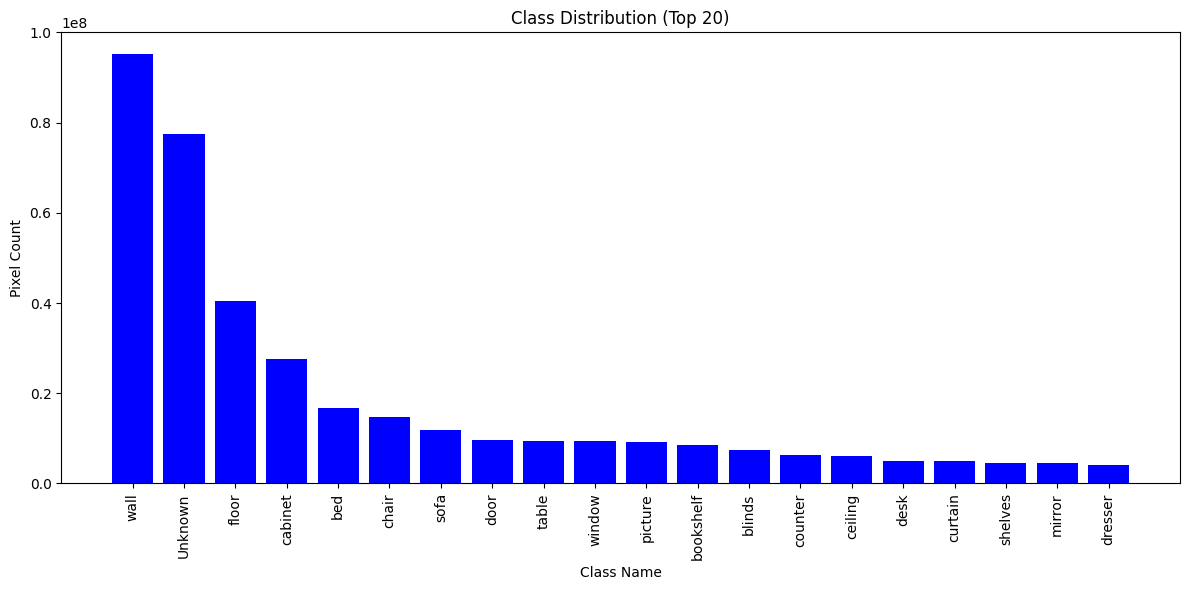

In [8]:
def calculate_label_distribution():
    label_pixel_counts = np.zeros(len(class_names) + 1)  # Include 'unlabeled' (ID 0)
    for i in range(num_images):
        label = np.array(labels[i])  # Shape: (640, 480)
        unique, counts = np.unique(label, return_counts=True)
        label_pixel_counts[unique] += counts  # Accumulate pixel counts
    total_pixels = label_pixel_counts.sum()
    label_percentages = label_pixel_counts / total_pixels * 100

    print("Top 10 Classes by Pixel Count:")
    sorted_indices = np.argsort(label_pixel_counts)[::-1]
    for idx in sorted_indices[:10]:
        label_name = "Unlabeled" if idx == 0 else class_id_to_name.get(idx, "Unknown")
        print(f"Class '{label_name}': {label_pixel_counts[idx]} pixels ({label_percentages[idx]:.2f}%)")

    # Plot distribution
    plt.figure(figsize=(12, 6))
    top_classes = sorted_indices[:20]
    plt.bar([class_id_to_name.get(idx, "Unknown") for idx in top_classes], label_pixel_counts[top_classes], color='blue')
    plt.xticks(rotation=90)
    plt.title("Class Distribution (Top 20)")
    plt.ylabel("Pixel Count")
    plt.xlabel("Class Name")
    plt.tight_layout()
    plt.show()
calculate_label_distribution()

Top 10 Classes by Prevalence:
Class 'Unlabeled': Present in 1449.0 images (100.00%)
Class 'wall': Present in 1409.0 images (97.24%)
Class 'floor': Present in 1246.0 images (85.99%)
Class 'picture': Present in 818.0 images (56.45%)
Class 'cabinet': Present in 664.0 images (45.82%)
Class 'chair': Present in 654.0 images (45.13%)
Class 'table': Present in 539.0 images (37.20%)
Class 'window': Present in 417.0 images (28.78%)
Class 'door': Present in 400.0 images (27.61%)
Class 'pillow': Present in 380.0 images (26.22%)


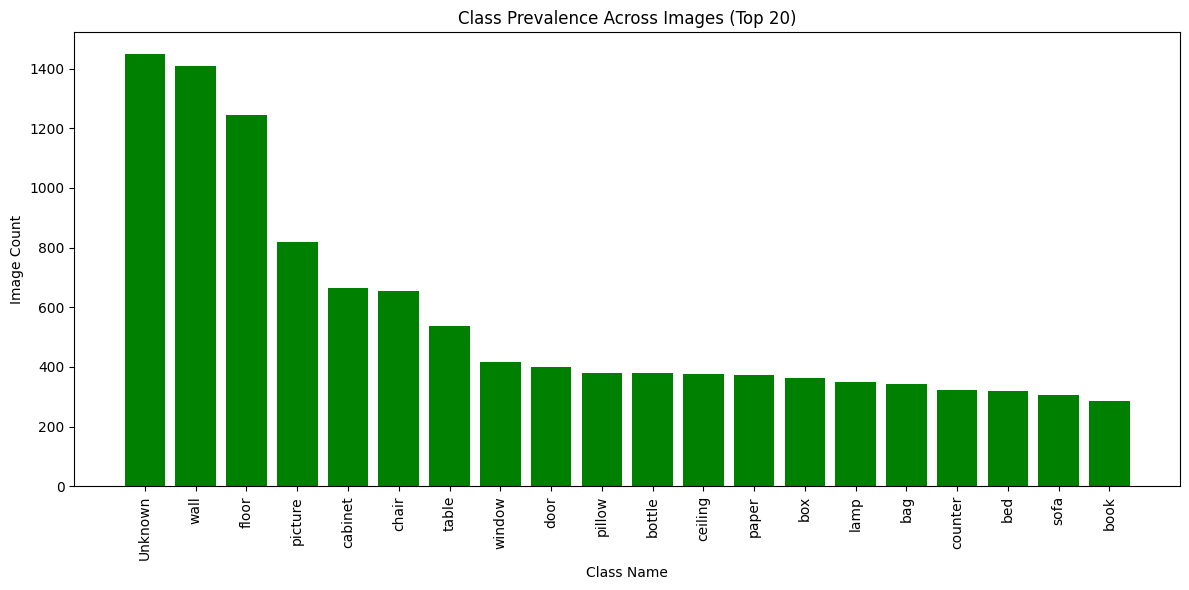

In [9]:
def analyze_class_prevalence():
    class_image_counts = np.zeros(len(class_names) + 1)  # Include 'unlabeled' (ID 0)
    for i in range(num_images):
        label = np.array(labels[i])  # Shape: (640, 480)
        unique = np.unique(label)
        class_image_counts[unique] += 1  # Count images containing each class
    total_images = num_images
    label_image_percentages = class_image_counts / total_images * 100

    print("Top 10 Classes by Prevalence:")
    sorted_indices = np.argsort(class_image_counts)[::-1]
    for idx in sorted_indices[:10]:
        label_name = "Unlabeled" if idx == 0 else class_id_to_name.get(idx, "Unknown")
        print(f"Class '{label_name}': Present in {class_image_counts[idx]} images ({label_image_percentages[idx]:.2f}%)")

    # Plot prevalence
    plt.figure(figsize=(12, 6))
    top_classes = sorted_indices[:20]
    plt.bar([class_id_to_name.get(idx, "Unknown") for idx in top_classes], class_image_counts[top_classes], color='green')
    plt.xticks(rotation=90)
    plt.title("Class Prevalence Across Images (Top 20)")
    plt.ylabel("Image Count")
    plt.xlabel("Class Name")
    plt.tight_layout()
    plt.show()
analyze_class_prevalence()

In [10]:
def read_image(index):
    img = images[index]  # Shape: (3, 640, 480)
    img = np.array(img).astype(np.uint8)
    print("Image shape after reading:", img.shape)
    img = img.transpose(1, 2, 0)  # Transpose to (640, 480, 3)
    print("Image shape after transpose:", img.shape)
    return img


In [11]:
def read_depth(index):
    depth = depths[index]  # Shape: (640, 480)
    depth = np.array(depth)
    print("Depth shape after reading:", depth.shape)
    # No need to transpose
    return depth

In [12]:
def read_label(index):
    label = labels[index]  # Shape: (640, 480)
    label = np.array(label)
    print("Label shape after reading:", label.shape)
    # No need to transpose
    return label

In [13]:
# Select the image index to visualize
i = 0  # Change this index to visualize different images

In [14]:
# Read data
img = read_image(i)
depth = read_depth(i)
label = read_label(i)

Image shape after reading: (3, 640, 480)
Image shape after transpose: (640, 480, 3)
Depth shape after reading: (640, 480)
Label shape after reading: (640, 480)


(np.float64(-0.5), np.float64(479.5), np.float64(639.5), np.float64(-0.5))

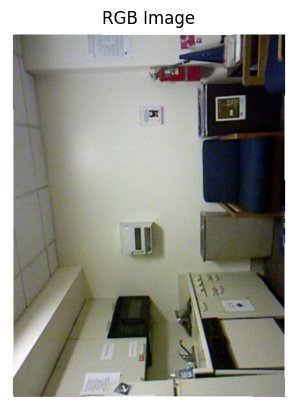

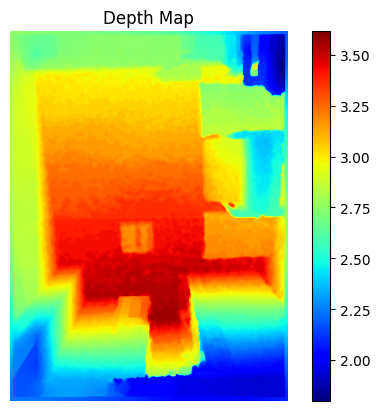

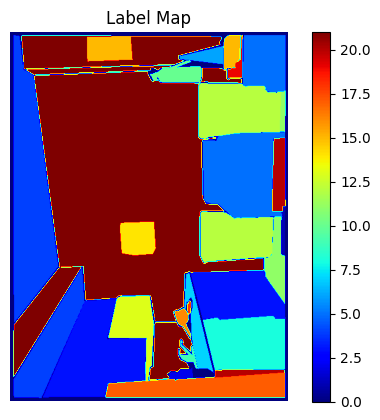

In [15]:
# Display the RGB image
plt.figure()
plt.imshow(img)
plt.title('RGB Image')
plt.axis('off')

# Display the depth map
plt.figure()
plt.imshow(depth, cmap='jet')
plt.title('Depth Map')
plt.colorbar()
plt.axis('off')

# Display the label map
plt.figure()
plt.imshow(label, cmap='jet')
plt.title('Label Map')
plt.colorbar()
plt.axis('off')

In [16]:
import cv2

def overlay_labels_with_names(image, labels, class_id_to_name, alpha=0.5, font_scale=0.5, font_thickness=1):
    """
    Overlays labels with their class names directly onto an RGB image.

    Parameters:
        image (ndarray): The RGB image (H, W, 3).
        labels (ndarray): The label map (H, W).
        class_id_to_name (dict): Mapping of class IDs to class names.
        alpha (float): Transparency for the overlay.
        font_scale (float): Font size for class names.
        font_thickness (int): Thickness of the text.

    Returns:
        None. Displays the overlaid image.
    """
    # Create a blank RGB overlay image for the labels
    overlay = np.zeros_like(image, dtype=np.uint8)

    # Assign random colors to each unique label
    unique_labels = np.unique(labels)
    label_colors = {label: np.random.randint(0, 255, 3) for label in unique_labels}

    # Apply the colors to the overlay
    for label, color in label_colors.items():
        overlay[labels == label] = color

    # Blend the original image with the overlay
    blended_image = ((1 - alpha) * image + alpha * overlay).astype(np.uint8)

    # Add class names as text
    blended_image_with_text = blended_image.copy()
    for label in unique_labels:
        if label in class_id_to_name:
            class_name = class_id_to_name[label]
        else:
            class_name = "Unknown"

        # Find a location to place the label (use the first occurrence of the label in the image)
        y, x = np.argwhere(labels == label)[0]
        color = tuple(int(c) for c in label_colors[label])  # Convert color to tuple for OpenCV

        # Add text to the image
        cv2.putText(
            blended_image_with_text,
            class_name,
            (x, y),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            color,
            thickness=font_thickness,
            lineType=cv2.LINE_AA
        )

    # Plot the final image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(blended_image_with_text, cv2.COLOR_BGR2RGB))
    plt.title('RGB Image with Labels Overlay and Class Names')
    plt.axis('off')  # Turn off axes
    plt.show()


Image shape after reading: (3, 640, 480)
Image shape after transpose: (640, 480, 3)
Label shape after reading: (640, 480)


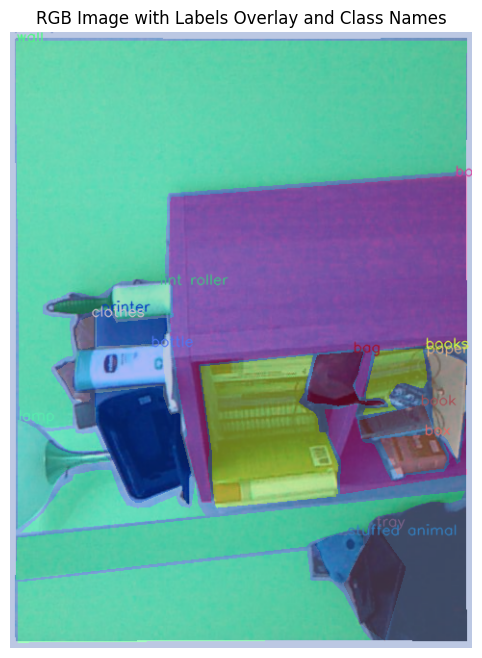

In [17]:
# Select an image and its corresponding label
image_index = 66  # Change this index to select different images
rgb_image = read_image(image_index)  # Shape: (640, 480, 3)
label_map = read_label(image_index)  # Shape: (640, 480)

# Call the overlay function
overlay_labels_with_names(rgb_image, label_map, class_id_to_name, alpha=0.5)


In [18]:
import numpy as np

# Suppose you have N total samples
N = images.shape[0]  # For example, if images is shaped (N, 3, H, W)

# Define the split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Ensure the ratios sum up to 1
assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Split ratios must sum to 1."

In [19]:
# Create a list of all indices
all_indices = np.arange(N)

# Optional: set a random seed for reproducibility
np.random.seed(42)
np.random.shuffle(all_indices)

# Compute split sizes
train_size = int(train_ratio * N)
val_size = int(val_ratio * N)
test_size = N - train_size - val_size  # The remainder goes to test

# Slice indices
train_indices = all_indices[:train_size]
val_indices = all_indices[train_size:train_size+val_size]
test_indices = all_indices[train_size+val_size:]

print("Number of training samples:", len(train_indices))
print("Number of validation samples:", len(val_indices))
print("Number of test samples:", len(test_indices))

Number of training samples: 1159
Number of validation samples: 144
Number of test samples: 146


In [20]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import cv2
from torchvision import transforms


In [21]:

class NYUDepthDataset(Dataset):
    def __init__(self, data, indices, 
                 rgb_mean=[0.485, 0.456, 0.406],
                 rgb_std=[0.229, 0.224, 0.225],
                 depth_scale=10.0,  # Example: if depth is in meters, scale for normalization
                 transform=None):
        """
        Args:
            data (h5py.File): The loaded HDF5 file object with 'images', 'depths', 'labels'.
            indices (array-like): The indices of samples to use (train, val, or test).
            rgb_mean, rgb_std: Normalization parameters for RGB images.
            depth_scale: A scaling factor for depth normalization (depth_norm = depth / depth_scale).
            transform (callable, optional): A function/transform that takes in 
                                            (rgb_image, depth_map, label_map) and returns transformed versions.
        """
        self.data = data
        self.indices = indices
        self.rgb_mean = rgb_mean
        self.rgb_std = rgb_std
        self.depth_scale = depth_scale
        self.transform = transform
        
        # Convert mean and std to tensors for quicker operations later
        self.rgb_mean = torch.tensor(self.rgb_mean).view(1,1,3)
        self.rgb_std = torch.tensor(self.rgb_std).view(1,1,3)

    def __len__(self):
        return len(self.indices)
    
    def __getitem__(self, idx):
        i = self.indices[idx]
        
        # Read RGB image: shape (3, H, W)
        rgb = np.array(self.data['images'][i], dtype=np.uint8)  # (3, H, W)
        rgb = np.transpose(rgb, (1, 2, 0))  # (H, W, 3)

        # Read depth map: shape (H, W)
        depth = np.array(self.data['depths'][i])  # typically float
        # Normalize the depth map (example: divide by a chosen scale)
        depth = depth / self.depth_scale
        
        # Read label map: shape (H, W), integers representing classes
        label_map = np.array(self.data['labels'][i])
        
        # Convert to tensors
        rgb = torch.from_numpy(rgb.astype(np.float32))  # (H, W, 3)
        depth = torch.from_numpy(depth.astype(np.float32))  # (H, W)
        label_map = torch.from_numpy(label_map.astype(np.int64))  # (H, W)
        
        # Normalize RGB channels (H, W, 3) -> (3, H, W)
        rgb = rgb.permute(2, 0, 1)  # (3, H, W)
        rgb = (rgb - self.rgb_mean.permute(2,0,1)) / self.rgb_std.permute(2,0,1)
        
        # If provided, apply transformations (including augmentations)
        # This can handle random crops, flips, etc.
        if self.transform:
            # transform should accept and return (rgb, depth, label_map)
            rgb, depth, label_map = self.transform(rgb, depth, label_map)
        
        return {
            'rgb': rgb,         # (3, H, W)
            'depth': depth.unsqueeze(0), # (1, H, W) for consistency
            'label': label_map   # (H, W)
        }

In [22]:
class RandomHorizontalFlip:
    """Flip the RGB, depth, and label maps horizontally with a 50% chance."""
    def __init__(self, flip_prob=0.5):
        self.flip_prob = flip_prob

    def __call__(self, rgb, depth, label_map):
        if np.random.rand() < self.flip_prob:
            # Ensure correct tensor dimensions
            if rgb.dim() != 3:
                raise ValueError(f"Expected RGB tensor to be 3D, got {rgb.dim()}D")
            if depth.dim() not in [2, 3]:
                raise ValueError(f"Expected Depth tensor to be 2D or 3D, got {depth.dim()}D")
            if label_map.dim() != 2:
                raise ValueError(f"Expected Label map tensor to be 2D, got {label_map.dim()}D")
            
            # Flip RGB along width dimension (dim=2)
            rgb = torch.flip(rgb, dims=[2])
            
            # Flip Depth along width dimension
            if depth.dim() == 3:
                depth = torch.flip(depth, dims=[2])
            else:
                depth = torch.flip(depth, dims=[1])
            
            # Flip Label map along width dimension (dim=1)
            label_map = torch.flip(label_map, dims=[1])
        
        return rgb, depth, label_map

In [23]:
# Create datasets
train_transform = RandomHorizontalFlip()
train_dataset = NYUDepthDataset(data, train_indices, transform=train_transform)
val_dataset = NYUDepthDataset(data, val_indices, transform=None)
test_dataset = NYUDepthDataset(data, test_indices, transform=None)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=4)

# Example iteration
for batch in train_loader:
    rgb_batch = batch['rgb']        # shape (B, 3, H, W)
    depth_batch = batch['depth']    # shape (B, 1, H, W)
    label_batch = batch['label']    # shape (B, H, W)
    # Now feed these into your model, compute loss, etc.
    break

In [24]:
from tqdm import tqdm
import torch
import torch.nn as nn
# from torchvision.models import resnet50
from torchvision.models import resnet50, ResNet50_Weights
from collections import OrderedDict
from torch.optim.lr_scheduler import CosineAnnealingLR

# from detr.models.backbone import Backbone, Joiner
# from detr.models.transformer import Transformer
# from detr.models.detr import DETR, SetCriterion, PostProcess
# from detr.util.misc import nested_tensor_from_tensor_list
# from detr.util.box_ops import box_cxcywh_to_xyxy, generalized_box_iou
# from detr.models.matcher import HungarianMatcher
# from detr.models.position_encoding import PositionEmbeddingSine
# from detr.models.backbone import BackboneBase


In [25]:
# Import necessary DETR components
from models.backbone import Backbone, Joiner
from models.transformer import Transformer
from models.detr import DETR, SetCriterion, PostProcess
from util.misc import nested_tensor_from_tensor_list
from util.box_ops import box_cxcywh_to_xyxy, generalized_box_iou
from models.matcher import HungarianMatcher
from models.position_encoding import PositionEmbeddingSine
from models.backbone import BackboneBase


In [26]:
def build_custom_backbone(model, train_backbone=True, return_interm_layers=True):
    # For a ResNet-50, the final layer typically outputs 2048 channels
    num_channels = 2048
    print(f"Building Backbone with return_interm_layers={return_interm_layers}")

    # Initialize BackboneBase without `return_layers`
    backbone = BackboneBase(
        backbone=model,
        train_backbone=train_backbone,
        num_channels=num_channels,
        return_interm_layers=return_interm_layers
    )
    return backbone

In [27]:
def batch_to_detr_targets(label_batch):
    """
    Convert a batch of label maps (B, H, W) into a format compatible with DETR.
    Each element in the returned list corresponds to one image's targets.
    DETR targets: a dict with 'boxes' and 'labels', where:
      - boxes: Tensor of shape [N, 4] in normalized center format [cx, cy, w, h]
      - labels: Tensor of shape [N] with class IDs (0-based, excluding background)

    Args:
        label_batch (Tensor): A batch of label maps, shape (B, H, W) with 
                              integers representing class IDs. 0 is assumed background.

    Returns:
        List[Dict[str, Tensor]]: A list of length B, each element a dict with keys "boxes" and "labels".
    """
    targets = []
    B, H, W = label_batch.shape

    for b in range(B):
        label_map = label_batch[b].cpu().numpy()  # Convert to numpy for easier processing
        unique_classes = np.unique(label_map)

        boxes = []
        labels = []
        for cls_id in unique_classes:
            if cls_id == 0:
                # Assuming 0 is background, skip it
                continue

            # Find all pixels belonging to this class
            ys, xs = np.where(label_map == cls_id)
            if len(ys) == 0:
                # No pixels for this class, skip
                continue
            
            # Compute bounding box in [x_min, y_min, x_max, y_max]
            x_min, x_max = xs.min(), xs.max()
            y_min, y_max = ys.min(), ys.max()

            # Convert to [cx, cy, w, h] in normalized coordinates
            cx = (x_min + x_max) / 2.0
            cy = (y_min + y_max) / 2.0
            bw = x_max - x_min + 1
            bh = y_max - y_min + 1

            # Normalize by image size
            cx_norm = cx / W
            cy_norm = cy / H
            bw_norm = bw / W
            bh_norm = bh / H

            boxes.append([cx_norm, cy_norm, bw_norm, bh_norm])
            # DETR class labeling: classes are typically 0-based.
            # If your class_id_to_name starts at 1, subtract 1 to make it 0-based.
            labels.append(cls_id - 1)  
        
        # If no objects found, still return empty tensors
        if len(boxes) == 0:
            boxes_tensor = torch.zeros((0, 4), dtype=torch.float32)
            labels_tensor = torch.zeros((0,), dtype=torch.int64)
        else:
            boxes_tensor = torch.tensor(boxes, dtype=torch.float32)
            labels_tensor = torch.tensor(labels, dtype=torch.int64)

        target_dict = {
            "boxes": boxes_tensor,
            "labels": labels_tensor
        }
        targets.append(target_dict)

    return targets


In [28]:
def modify_resnet_for_4_channels():
    # Load a pre-trained resnet50
    # model = resnet50(pretrained=True)
    model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

    
    # Extract the first convolutional layer
    old_conv = model.conv1  # old_conv: nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
    
    # Create a new convolutional layer that accepts 4 channels
    new_conv = nn.Conv2d(4, old_conv.out_channels,
                         kernel_size=old_conv.kernel_size,
                         stride=old_conv.stride,
                         padding=old_conv.padding,
                         bias=(old_conv.bias is not None))
    
    # Copy over the weights for the first 3 channels from the old convolution
    new_conv.weight.data[:, :3, :, :] = old_conv.weight.data
    # Initialize the 4th channel’s weights. Here, we just use the mean of the RGB channels as an example.
    new_conv.weight.data[:, 3:4, :, :] = old_conv.weight.data.mean(dim=1, keepdim=True)
    
    # If bias exists, copy it
    if old_conv.bias is not None:
        new_conv.bias.data = old_conv.bias.data
    
    # Replace the old conv layer with the new one
    model.conv1 = new_conv
    
    return model

# Usage:
# backbone = modify_resnet_for_4_channels()
# Now your backbone can handle (B,4,H,W) inputs.

# Later, integrate this into DETR or your transformer-based detection pipeline.


In [29]:
def build_detr_with_depth(num_classes=894, hidden_dim=256, num_queries=100):
    backbone_model = modify_resnet_for_4_channels()

    backbone = build_custom_backbone(backbone_model, train_backbone=True, return_interm_layers=True)

    position_embedding = PositionEmbeddingSine(hidden_dim // 2, normalize=True)
    model = Joiner(backbone, position_embedding)
    model.num_channels = backbone.num_channels

    transformer = Transformer(
        d_model=hidden_dim,
        dropout=0.1,
        nhead=8,
        num_encoder_layers=6,
        num_decoder_layers=6,
        dim_feedforward=2048,
        normalize_before=False
    )


    detr = DETR(
        backbone=model,
        transformer=transformer,
        num_classes=num_classes,
        num_queries=num_queries,
        aux_loss=True
    )
    return detr


In [30]:
# Rebuild the model with the updated backbone
model = build_detr_with_depth(num_classes=len(class_names))


Building Backbone with return_interm_layers=True


In [31]:
# Example Test
try:
    model = build_detr_with_depth(num_classes=len(class_names))
    print("DETR model initialized successfully!")
except Exception as e:
    print("Model initialization failed:", e)


Building Backbone with return_interm_layers=True
DETR model initialized successfully!


In [32]:
def compute_iou(box1, box2):
    """
    Compute IoU between two bounding boxes.
    box format: [cx, cy, w, h] normalized.
    Convert them to [x_min, y_min, x_max, y_max] before calculation.
    """
    def to_xyxy(box):
        cx, cy, w, h = box
        x1 = cx - w/2
        y1 = cy - h/2
        x2 = cx + w/2
        y2 = cy + h/2
        return x1, y1, x2, y2
    
    x1_1, y1_1, x2_1, y2_1 = to_xyxy(box1)
    x1_2, y1_2, x2_2, y2_2 = to_xyxy(box2)
    
    inter_x1 = max(x1_1, x1_2)
    inter_y1 = max(y1_1, y1_2)
    inter_x2 = min(x2_1, x2_2)
    inter_y2 = min(y2_1, y2_2)
    inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)
    
    area_1 = (x2_1 - x1_1) * (y2_1 - y1_1)
    area_2 = (x2_2 - x1_2) * (y2_2 - y1_2)
    
    union_area = area_1 + area_2 - inter_area
    if union_area == 0:
        return 0.0
    return inter_area / union_area

In [33]:
def evaluate_model(model, val_loader, device, iou_threshold=0.5):
    model.eval()
    all_tp = 0
    all_fp = 0
    all_fn = 0

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Evaluating"):
            rgb = batch['rgb'].to(device)      # (B,3,H,W)
            depth = batch['depth'].to(device)  # (B,1,H,W)
            inputs = torch.cat([rgb, depth], dim=1)
            inputs_nested = nested_tensor_from_tensor_list(inputs)

            outputs = model(inputs_nested)

            # Convert outputs and targets to a usable format
            # targets: list of dicts with "boxes" and "labels"
            targets = batch_to_detr_targets(batch['label'])
            for t in targets:
                t['boxes'] = t['boxes'].to(device)
                t['labels'] = t['labels'].to(device)

            # Suppose outputs['pred_logits'] shape: (B, num_queries, num_classes+1)
            # outputs['pred_boxes']: (B, num_queries, 4)
            pred_logits = outputs['pred_logits']
            pred_boxes = outputs['pred_boxes']

            # For simplicity, pick the top scoring predictions
            # Convert logits to probabilities and filter low-score predictions
            prob = pred_logits.softmax(-1)  # (B, num_queries, num_classes+1)
            # Remove the no-object class (last one)
            prob_obj = prob[..., :-1]
            scores, labels = prob_obj.max(-1)
            
            for i in range(len(targets)):
                gt_boxes = targets[i]['boxes']
                gt_labels = targets[i]['labels']
                
                # Select predictions for this image
                scores_img = scores[i]
                labels_img = labels[i]
                boxes_img = pred_boxes[i]

                # Filter out low confidence detections (e.g., score > 0.5)
                keep = scores_img > 0.5
                scores_img = scores_img[keep]
                labels_img = labels_img[keep]
                boxes_img = boxes_img[keep]

                # Match predicted boxes to ground truth
                matched_gt = set()
                tp = 0
                fp = 0
                
                for pbox, plabel, pscore in zip(boxes_img, labels_img, scores_img):
                    # Find the best matching ground truth box
                    ious = [compute_iou(pbox, gbox) for gbox in gt_boxes]
                    best_iou_idx = torch.argmax(torch.tensor(ious))
                    best_iou = ious[best_iou_idx]
                    if best_iou > iou_threshold and plabel == gt_labels[best_iou_idx]:
                        if best_iou_idx not in matched_gt:
                            matched_gt.add(best_iou_idx)
                            tp += 1
                        else:
                            # This predicted box matched a GT box already matched by another prediction
                            fp += 1
                    else:
                        # No suitable GT match found
                        fp += 1

                fn = len(gt_boxes) - len(matched_gt)  # ground truths not matched by any prediction

                all_tp += tp
                all_fp += fp
                all_fn += fn

    # Compute precision and recall
    precision = all_tp / (all_tp + all_fp + 1e-6)
    recall = all_tp / (all_tp + all_fn + 1e-6)
    
    return precision, recall

In [34]:
# Step 3: Initialize Model, Matcher, Loss, etc.
num_classes = len(class_names)  # Example for COCO, adjust based on your dataset
model = build_detr_with_depth(num_classes=num_classes)

# Hungarian matcher for DETR
matcher = HungarianMatcher(cost_class=1, cost_bbox=5, cost_giou=2)
weight_dict = {"loss_ce": 20, "loss_bbox": 2, "loss_giou": 2}
# Indices of the losses to produce auxiliary decoding layers
aux_losses = ["loss_ce", "loss_bbox", "loss_giou"]


eos_coef = 0.01
criterion = SetCriterion(num_classes, matcher=matcher, weight_dict=weight_dict, eos_coef=eos_coef, losses=["labels", "boxes", "cardinality"])
postprocessors = {"bbox": PostProcess()}

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=1e-4)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=1.1)
scheduler = CosineAnnealingLR(optimizer, T_max=10)

Building Backbone with return_interm_layers=True


In [35]:
def calculate_accuracy(outputs, targets, iou_threshold=0.5):
    """
    Calculate accuracy for detection outputs based on IoU and class matching.
    """
    total_predictions = 0
    correct_predictions = 0

    for i in range(len(targets)):
        gt_boxes = targets[i]['boxes']
        gt_labels = targets[i]['labels']
        
        pred_logits = outputs['pred_logits'][i]
        pred_boxes = outputs['pred_boxes'][i]

        # Convert logits to probabilities
        prob = pred_logits.softmax(-1)  # (num_queries, num_classes + 1)
        prob_obj = prob[..., :-1]
        scores, labels = prob_obj.max(-1)  # (num_queries,)
        
        # Filter predictions by confidence
        keep = scores > 0.5
        pred_boxes = pred_boxes[keep]
        pred_labels = labels[keep]

        for pred_box, pred_label in zip(pred_boxes, pred_labels):
            # Find the IoU with all ground truth boxes
            ious = [compute_iou(pred_box.cpu(), gt_box.cpu()) for gt_box in gt_boxes]
            best_iou_idx = torch.argmax(torch.tensor(ious))
            best_iou = ious[best_iou_idx]
            
            # Check if this prediction is correct
            if best_iou > iou_threshold and pred_label == gt_labels[best_iou_idx]:
                correct_predictions += 1
            total_predictions += 1
    
    accuracy = correct_predictions / (total_predictions + 1e-6)  # Avoid division by zero
    return accuracy

In [36]:
def aggregate_losses(loss_dict, weight_dict):
    total = 0.0
    # Primary losses
    for k in ['loss_ce', 'loss_bbox', 'loss_giou']:
        if k in loss_dict:
            total += loss_dict[k] * weight_dict.get(k, 1)
            # print(f"Primary {k}: {loss_dict[k].item()} * {weight_dict.get(k, 1)}")
    
    # Auxiliary losses
    if 'aux_outputs' in loss_dict:
        for i, aux_loss in enumerate(loss_dict['aux_outputs']):
            for k in ['loss_ce', 'loss_bbox', 'loss_giou']:
                if k in aux_loss:
                    total += aux_loss[k] * weight_dict.get(k, 1)
                    # print(f"Aux {k} (Layer {i+1}): {aux_loss[k].item()} * {weight_dict.get(k, 1)}")
    
    return total


In [37]:
# Step 4: Training Loop Example
# Assuming you have train_loader from previous steps
num_epochs = 60
train_loss_history = []
val_loss_history = []
total_train_accuracy = 0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch_idx,batch in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
        rgb = batch['rgb'].to(device)
        depth = batch['depth'].to(device)
        inputs = torch.cat([rgb, depth], dim=1)
        inputs_nested = nested_tensor_from_tensor_list(inputs)

        outputs = model(inputs_nested)
        
        targets = batch_to_detr_targets(batch['label'])

        for t in targets:
            t['boxes'] = t['boxes'].to(device)
            t['labels'] = t['labels'].to(device)

        loss_dict = criterion(outputs, targets)

        # Initialize total loss for this batch
        losses = 0.0
        
        losses = aggregate_losses(loss_dict, weight_dict)

        
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
        total_loss += losses.item()

        train_accuracy = calculate_accuracy(outputs,targets)
        total_train_accuracy += train_accuracy

        # Extract logits for the first image in the batch
        # pred_logits = outputs['pred_logits'][0]  # Shape: (num_queries, num_classes+1)
        # pred_probs = pred_logits.softmax(-1)  # Convert logits to probabilities
        # pred_scores, pred_classes = pred_probs.max(-1)  # Get highest probabilities and corresponding classes

        # # Print predictions for the first 10 queries
        # print("Predicted Probabilities (First 10):", pred_scores[:10].cpu().detach().numpy())
        # print("Predicted Classes (First 10):", pred_classes[:10].cpu().numpy())

        # # Check how many queries are classified as "no object" (last class)
        # no_object_count = (pred_classes == (pred_logits.shape[-1] - 1)).sum().item()
        # print(f"Number of 'no object' predictions: {no_object_count} / {pred_logits.shape[0]}")




    avg_train_loss = total_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)
    avg_train_accuracy = total_train_accuracy / len(test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Training Loss: {avg_train_loss:.4f},Train_Accuracy: {avg_train_accuracy:.4f}")
    
    # Evaluate on validation set
    model.eval()
    total_val_loss = 0
    total_val_accuracy = 0
    with torch.no_grad():
        for batch in val_loader:
            rgb = batch['rgb'].to(device)
            depth = batch['depth'].to(device)
            inputs = torch.cat([rgb, depth], dim=1)
            inputs_nested = nested_tensor_from_tensor_list(inputs)
            outputs = model(inputs_nested)

            targets = batch_to_detr_targets(batch['label'])
            for t in targets:
                t['boxes'] = t['boxes'].to(device)
                t['labels'] = t['labels'].to(device)

            loss_dict = criterion(outputs, targets)

            # val_loss = sum(loss_dict[k] for k in loss_dict.keys() if k in weight_dict)
            val_losses = aggregate_losses(loss_dict, weight_dict)

            total_val_loss += val_losses.item()

            accuracy = calculate_accuracy(outputs, targets)
            total_val_accuracy += accuracy

    avg_val_loss = total_val_loss / len(val_loader)
    val_loss_history.append(avg_val_loss)
    avg_val_accuracy = total_val_accuracy / len(val_loader)
    print(f"Validation Loss: {avg_val_loss:.4f}, Val_Accuracy: {avg_val_accuracy:.4f}")


print("Training complete!")

Epoch 1/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 1/60, Average Training Loss: 129.9472,Train_Accuracy: 0.0000


Validation Loss: 122.0904, Val_Accuracy: 0.0000


Epoch 2/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 2/60, Average Training Loss: 121.8878,Train_Accuracy: 0.0000


Validation Loss: 118.9550, Val_Accuracy: 0.0000


Epoch 3/60: 100%|██████████| 290/290 [00:40<00:00,  7.23it/s]

Epoch 3/60, Average Training Loss: 119.6058,Train_Accuracy: 0.0000


Validation Loss: 117.3897, Val_Accuracy: 0.0000


Epoch 4/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 4/60, Average Training Loss: 118.1978,Train_Accuracy: 0.0000


Validation Loss: 116.0808, Val_Accuracy: 0.0000


Epoch 5/60: 100%|██████████| 290/290 [00:40<00:00,  7.21it/s]

Epoch 5/60, Average Training Loss: 117.0136,Train_Accuracy: 0.0000


Validation Loss: 114.9924, Val_Accuracy: 0.0000


Epoch 6/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 6/60, Average Training Loss: 115.8988,Train_Accuracy: 0.0000


Validation Loss: 113.9728, Val_Accuracy: 0.0000


Epoch 7/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 7/60, Average Training Loss: 114.8168,Train_Accuracy: 0.0000


Validation Loss: 113.0515, Val_Accuracy: 0.0000


Epoch 8/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 8/60, Average Training Loss: 113.9501,Train_Accuracy: 0.0000


Validation Loss: 112.1006, Val_Accuracy: 0.0000


Epoch 9/60: 100%|██████████| 290/290 [00:40<00:00,  7.19it/s]

Epoch 9/60, Average Training Loss: 112.9287,Train_Accuracy: 0.0000


Validation Loss: 111.2325, Val_Accuracy: 0.0000


Epoch 10/60: 100%|██████████| 290/290 [00:40<00:00,  7.23it/s]

Epoch 10/60, Average Training Loss: 111.9627,Train_Accuracy: 0.0000


Validation Loss: 110.3222, Val_Accuracy: 0.0000


Epoch 11/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 11/60, Average Training Loss: 111.1419,Train_Accuracy: 0.0000


Validation Loss: 109.5264, Val_Accuracy: 0.0000


Epoch 12/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 12/60, Average Training Loss: 110.2840,Train_Accuracy: 0.0000


Validation Loss: 108.6614, Val_Accuracy: 0.0000


Epoch 13/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 13/60, Average Training Loss: 109.3094,Train_Accuracy: 0.0000


Validation Loss: 107.9208, Val_Accuracy: 0.0000


Epoch 14/60: 100%|██████████| 290/290 [00:40<00:00,  7.21it/s]

Epoch 14/60, Average Training Loss: 108.5357,Train_Accuracy: 0.0000


Validation Loss: 107.1648, Val_Accuracy: 0.0000


Epoch 15/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 15/60, Average Training Loss: 107.8765,Train_Accuracy: 0.0000


Validation Loss: 106.5628, Val_Accuracy: 0.0000


Epoch 16/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 16/60, Average Training Loss: 107.0930,Train_Accuracy: 0.0000


Validation Loss: 105.9308, Val_Accuracy: 0.0000


Epoch 17/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 17/60, Average Training Loss: 106.4275,Train_Accuracy: 0.0000


Validation Loss: 105.2681, Val_Accuracy: 0.0000


Epoch 18/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 18/60, Average Training Loss: 105.7797,Train_Accuracy: 0.0000


Validation Loss: 104.8796, Val_Accuracy: 0.0000


Epoch 19/60: 100%|██████████| 290/290 [00:40<00:00,  7.21it/s]

Epoch 19/60, Average Training Loss: 105.1499,Train_Accuracy: 0.0000


Validation Loss: 104.2209, Val_Accuracy: 0.0000


Epoch 20/60: 100%|██████████| 290/290 [00:40<00:00,  7.23it/s]

Epoch 20/60, Average Training Loss: 104.5375,Train_Accuracy: 0.0000


Validation Loss: 103.6487, Val_Accuracy: 0.0000


Epoch 21/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 21/60, Average Training Loss: 104.0241,Train_Accuracy: 0.0000


Validation Loss: 103.2208, Val_Accuracy: 0.0000


Epoch 22/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 22/60, Average Training Loss: 103.4931,Train_Accuracy: 0.0000


Validation Loss: 102.7869, Val_Accuracy: 0.0000


Epoch 23/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 23/60, Average Training Loss: 102.9587,Train_Accuracy: 0.0000


Validation Loss: 102.4466, Val_Accuracy: 0.0000


Epoch 24/60: 100%|██████████| 290/290 [00:40<00:00,  7.21it/s]

Epoch 24/60, Average Training Loss: 102.4853,Train_Accuracy: 0.0000


Validation Loss: 101.9235, Val_Accuracy: 0.0000


Epoch 25/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 25/60, Average Training Loss: 101.9628,Train_Accuracy: 0.0000


Validation Loss: 101.5788, Val_Accuracy: 0.0000


Epoch 26/60: 100%|██████████| 290/290 [00:40<00:00,  7.23it/s]

Epoch 26/60, Average Training Loss: 101.5704,Train_Accuracy: 0.0000


Validation Loss: 101.1855, Val_Accuracy: 0.0000


Epoch 27/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 27/60, Average Training Loss: 101.0935,Train_Accuracy: 0.0000


Validation Loss: 100.8565, Val_Accuracy: 0.0000


Epoch 28/60: 100%|██████████| 290/290 [00:40<00:00,  7.21it/s]

Epoch 28/60, Average Training Loss: 100.6842,Train_Accuracy: 0.0000


Validation Loss: 100.6068, Val_Accuracy: 0.0000


Epoch 29/60: 100%|██████████| 290/290 [00:40<00:00,  7.24it/s]

Epoch 29/60, Average Training Loss: 100.2818,Train_Accuracy: 0.0000


Validation Loss: 100.2475, Val_Accuracy: 0.0000


Epoch 30/60: 100%|██████████| 290/290 [00:40<00:00,  7.23it/s]

Epoch 30/60, Average Training Loss: 99.9263,Train_Accuracy: 0.0000


Validation Loss: 99.9326, Val_Accuracy: 0.0000


Epoch 31/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 31/60, Average Training Loss: 99.6341,Train_Accuracy: 0.0000


Validation Loss: 99.7934, Val_Accuracy: 0.0000


Epoch 32/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 32/60, Average Training Loss: 99.1709,Train_Accuracy: 0.0000


Validation Loss: 99.6179, Val_Accuracy: 0.0000


Epoch 33/60: 100%|██████████| 290/290 [00:40<00:00,  7.21it/s]

Epoch 33/60, Average Training Loss: 98.7495,Train_Accuracy: 0.0000


Validation Loss: 99.2361, Val_Accuracy: 0.0000


Epoch 34/60: 100%|██████████| 290/290 [00:40<00:00,  7.21it/s]

Epoch 34/60, Average Training Loss: 98.4816,Train_Accuracy: 0.0000


Validation Loss: 99.0615, Val_Accuracy: 0.0000


Epoch 35/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 35/60, Average Training Loss: 98.0903,Train_Accuracy: 0.0000


Validation Loss: 98.8638, Val_Accuracy: 0.0000


Epoch 36/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 36/60, Average Training Loss: 97.9397,Train_Accuracy: 0.0000


Validation Loss: 98.7789, Val_Accuracy: 0.0000


Epoch 37/60: 100%|██████████| 290/290 [00:40<00:00,  7.23it/s]

Epoch 37/60, Average Training Loss: 97.5350,Train_Accuracy: 0.0000


Validation Loss: 98.3955, Val_Accuracy: 0.0000


Epoch 38/60: 100%|██████████| 290/290 [00:40<00:00,  7.24it/s]

Epoch 38/60, Average Training Loss: 97.2878,Train_Accuracy: 0.0000


Validation Loss: 98.2821, Val_Accuracy: 0.0000


Epoch 39/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 39/60, Average Training Loss: 96.9668,Train_Accuracy: 0.0000


Validation Loss: 98.1719, Val_Accuracy: 0.0000


Epoch 40/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 40/60, Average Training Loss: 96.7892,Train_Accuracy: 0.0000


Validation Loss: 97.9157, Val_Accuracy: 0.0000


Epoch 41/60: 100%|██████████| 290/290 [00:40<00:00,  7.23it/s]

Epoch 41/60, Average Training Loss: 96.3604,Train_Accuracy: 0.0000


Validation Loss: 97.8982, Val_Accuracy: 0.0000


Epoch 42/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 42/60, Average Training Loss: 96.1548,Train_Accuracy: 0.0000


Validation Loss: 97.7297, Val_Accuracy: 0.0000


Epoch 43/60: 100%|██████████| 290/290 [00:40<00:00,  7.21it/s]

Epoch 43/60, Average Training Loss: 95.9100,Train_Accuracy: 0.0000


Validation Loss: 97.4896, Val_Accuracy: 0.0000


Epoch 44/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 44/60, Average Training Loss: 95.6574,Train_Accuracy: 0.0000


Validation Loss: 97.6126, Val_Accuracy: 0.0000


Epoch 45/60: 100%|██████████| 290/290 [00:40<00:00,  7.23it/s]

Epoch 45/60, Average Training Loss: 95.4890,Train_Accuracy: 0.0000


Validation Loss: 97.3374, Val_Accuracy: 0.0000


Epoch 46/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 46/60, Average Training Loss: 95.1878,Train_Accuracy: 0.0000


Validation Loss: 97.1900, Val_Accuracy: 0.0000


Epoch 47/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 47/60, Average Training Loss: 95.0441,Train_Accuracy: 0.0000


Validation Loss: 97.1078, Val_Accuracy: 0.0000


Epoch 48/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 48/60, Average Training Loss: 94.7764,Train_Accuracy: 0.0000


Validation Loss: 97.0204, Val_Accuracy: 0.0000


Epoch 49/60: 100%|██████████| 290/290 [00:40<00:00,  7.23it/s]

Epoch 49/60, Average Training Loss: 94.5953,Train_Accuracy: 0.0000


Validation Loss: 96.9641, Val_Accuracy: 0.0000


Epoch 50/60: 100%|██████████| 290/290 [00:40<00:00,  7.23it/s]

Epoch 50/60, Average Training Loss: 94.2699,Train_Accuracy: 0.0000


Validation Loss: 96.8620, Val_Accuracy: 0.0000


Epoch 51/60: 100%|██████████| 290/290 [00:40<00:00,  7.21it/s]

Epoch 51/60, Average Training Loss: 94.1493,Train_Accuracy: 0.0000


Validation Loss: 96.7318, Val_Accuracy: 0.0000


Epoch 52/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 52/60, Average Training Loss: 93.8862,Train_Accuracy: 0.0000


Validation Loss: 96.6715, Val_Accuracy: 0.0000


Epoch 53/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 53/60, Average Training Loss: 93.7731,Train_Accuracy: 0.0000


Validation Loss: 96.5092, Val_Accuracy: 0.0000


Epoch 54/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 54/60, Average Training Loss: 93.6767,Train_Accuracy: 0.0000


Validation Loss: 96.5281, Val_Accuracy: 0.0000


Epoch 55/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 55/60, Average Training Loss: 93.3007,Train_Accuracy: 0.0000


Validation Loss: 96.4454, Val_Accuracy: 0.0000


Epoch 56/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 56/60, Average Training Loss: 93.2732,Train_Accuracy: 0.0000


Validation Loss: 96.3389, Val_Accuracy: 0.0000


Epoch 57/60: 100%|██████████| 290/290 [00:40<00:00,  7.20it/s]

Epoch 57/60, Average Training Loss: 92.8958,Train_Accuracy: 0.0000


Validation Loss: 96.3746, Val_Accuracy: 0.0000


Epoch 58/60: 100%|██████████| 290/290 [00:40<00:00,  7.21it/s]

Epoch 58/60, Average Training Loss: 92.8134,Train_Accuracy: 0.0000


Validation Loss: 96.3265, Val_Accuracy: 0.0000


Epoch 59/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 59/60, Average Training Loss: 92.7066,Train_Accuracy: 0.0000


Validation Loss: 96.2583, Val_Accuracy: 0.0000


Epoch 60/60: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]

Epoch 60/60, Average Training Loss: 92.4171,Train_Accuracy: 0.0000


Validation Loss: 96.1535, Val_Accuracy: 0.0000
Training complete!


In [38]:
# # After training:
# plt.figure(figsize=(10,5))
# plt.title("Training and Validation Loss")
# plt.plot(train_loss_history, label="train")
# plt.plot(val_loss_history, label="val")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

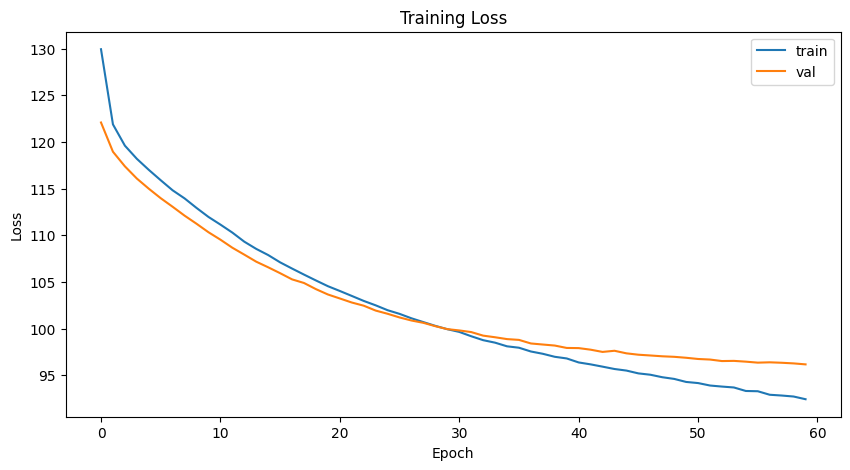

In [39]:
# After training:
plt.figure(figsize=(10,5))
plt.title("Training Loss")
plt.plot(train_loss_history, label="train")
plt.plot(val_loss_history, label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

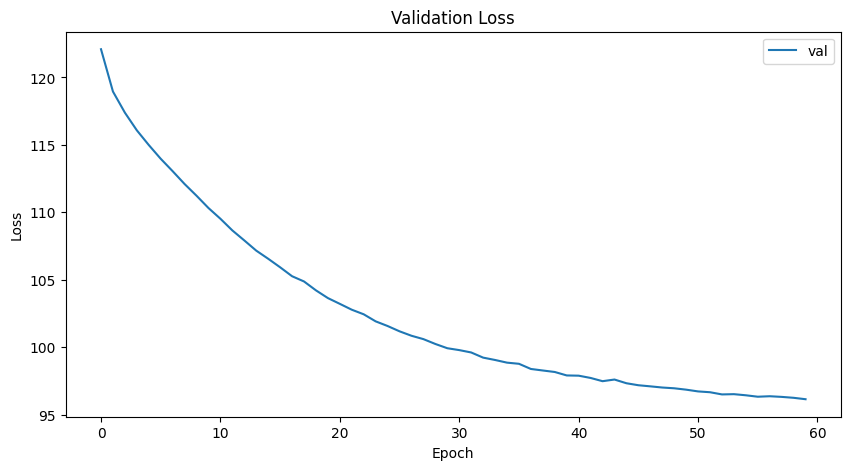

In [40]:
# After training:
plt.figure(figsize=(10,5))
plt.title("Validation Loss")
plt.plot(val_loss_history, label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [41]:
def test_model(model, test_loader, device, iou_threshold=0.5):
    model.eval()
    total_test_loss = 0
    total_test_accuracy = 0

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            rgb = batch['rgb'].to(device)
            depth = batch['depth'].to(device)
            inputs = torch.cat([rgb, depth], dim=1)
            inputs_nested = nested_tensor_from_tensor_list(inputs)
            outputs = model(inputs_nested)

            targets = batch_to_detr_targets(batch['label'])
            for t in targets:
                t['boxes'] = t['boxes'].to(device)
                t['labels'] = t['labels'].to(device)

            loss_dict = criterion(outputs, targets)
            test_loss = sum(loss_dict[k] for k in loss_dict.keys() if k in weight_dict)
            total_test_loss += test_loss.item()

            accuracy = calculate_accuracy(outputs, targets, iou_threshold)
            total_test_accuracy += accuracy

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = total_test_accuracy / len(test_loader)

    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_accuracy:.4f}")


# Run testing after training
test_model(model, test_loader, device)


Testing: 100%|██████████| 37/37 [00:02<00:00, 15.52it/s]

Test Loss: 6.5709, Test Accuracy: 0.0000
